In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pickle

In [5]:
data = pd.read_csv("HR_comma_sep.csv")
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [6]:
data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
left = data[data.left==1]
left.shape

(3571, 10)

In [9]:
retained = data[data.left==0]
retained.shape

(11428, 10)

In [14]:
numeric_columns = data.select_dtypes(include='number').columns
grouped = data.groupby('left')[numeric_columns].mean()
grouped

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
left,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321


<Axes: xlabel='salary'>

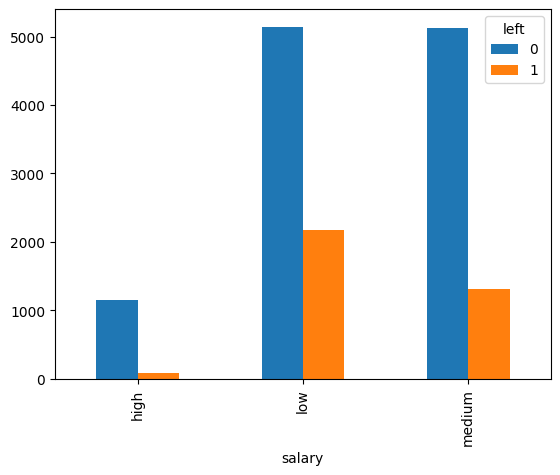

In [15]:
pd.crosstab(data.salary,data.left).plot(kind='bar')

<Axes: xlabel='Department'>

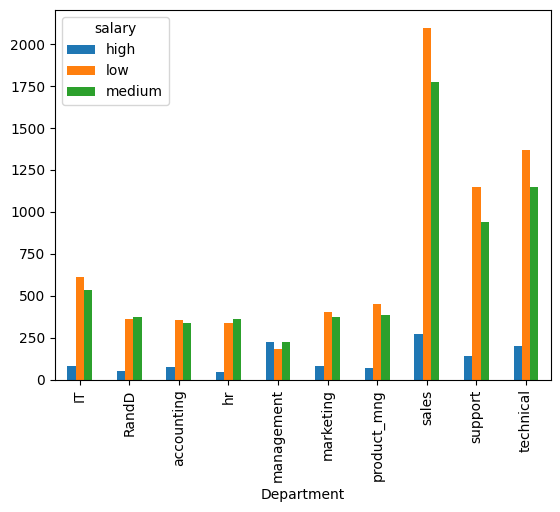

In [16]:
pd.crosstab(data.Department,data.salary).plot(kind='bar') #crosstab is used to compare categorical data  generally used for data analysis

<Axes: xlabel='Department'>

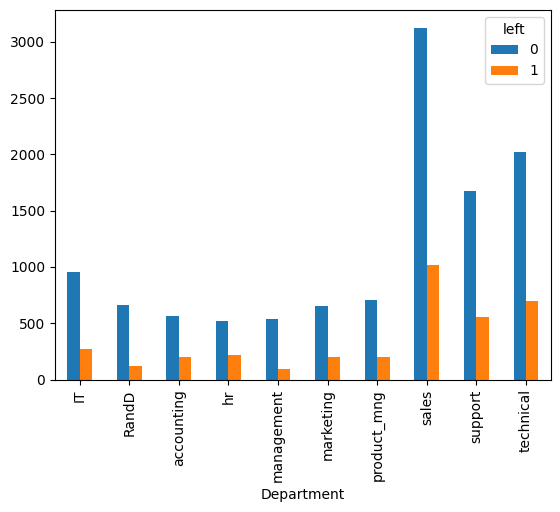

In [17]:
pd.crosstab(data.Department,data.left).plot(kind='bar')

In [19]:
subdf = data[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [20]:
saldummy=pd.get_dummies(subdf.salary,prefix="salary")

In [21]:
merged=pd.concat([subdf,saldummy], axis='columns')

In [22]:
merged.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False


In [23]:
merged.drop('salary',axis='columns',inplace=True)
merged.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [24]:
x=merged
x.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [25]:
y=data.left

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

In [44]:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression(max_iter=1000)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [45]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear', max_iter=2000))

# Fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=2000, solver='liblinear'))])

In [46]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
model.score(X_test,y_test)

0.7673333333333333